In [1]:
from sklearn import datasets
from sklearn import model_selection #осигурява functions for cross_validation
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
### Regression

### Ще използваме dataset с 50 samples and 50 features, като само 10 от тях са informative.
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) # make_regression генерира данни
# с исканите характеристики
# type(y_all) # both are arrays

In [11]:
# разделяме database на 2 равни части
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [12]:
# за обикновена лин. регресия има LinearRegression class от sklearn.linear_model
# има и малки разлики във функциите на sklearn и statsmodels за което трябва да се внимава, когато се използват заедно
model = linear_model.LinearRegression() # create instance; създаваме модел, чието име е model
model.fit(X_train, y_train) # invoke fit; първи аргумент е feature matrix, втори е response variable

LinearRegression()

In [13]:
# пресмята sum of squared errors/residuals, но тъй като няма конкретна функция за това, ще дефинираме една
def sse(resid):
    return np.sum(resid**2)

sse_train = sse(y_train - model.predict(X_train)) #calculate sum of squared errors of the training model
sse_train # practically zero, което е съвсем нормално при 25 samples и 50 features

4.3673990285676756e-24

In [14]:
# проверяваме за test data
sse_test = sse(y_test - model.predict(X_test))
sse_test # много по-голямо число, т.е. не е подходящ за predicting; overfitting

418097.628133271

In [15]:
# друг вариант за проверка е r-squared score
model.score(X_train, y_train) # 1.0
model.score(X_test, y_test) # 0.4648, indicates overfitting

0.5983959726069321

In [16]:
# може да покажем resuduals
# дефинираме подходяща функция и след това я извикваме за resuduals на train и test data.
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

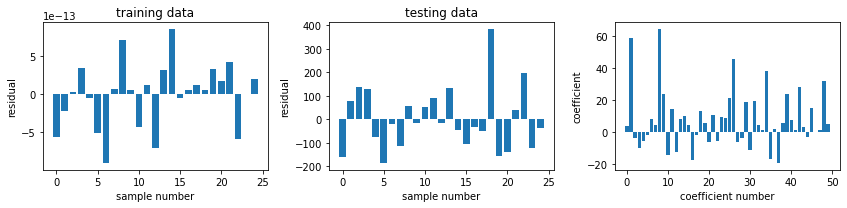

In [17]:
# box plot за residuals на train и test data, както и за стойностите на коефициентите 
resid_train = y_train - model.predict(X_train)
resid_test =  y_test - model.predict(X_test)                                     

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_) # .coef_ за модела; има .intercept_ за своб. чл.

In [21]:
### Демонстрация на Ridge regression. Използваме клас Ridge от sklearn.linear_model, подобно на LinearRegression по-горе
model = linear_model.Ridge(alpha=2.5) # избираме тази стойност на alpha; моделът отново се казва model!
model.fit(X_train, y_train) # същото като обикновената линейна регресия

Ridge(alpha=2.5)

In [22]:
# пресмятаме SSE за test и train data; виждаме, че sse вече не е 0 за train data, но е почти същото за test.
sse_train = sse(y_train - model.predict(X_train))
sse_test = sse(y_test - model.predict(X_test))
print(sse_train, sse_test)

3218.86334017836 437964.69311345305


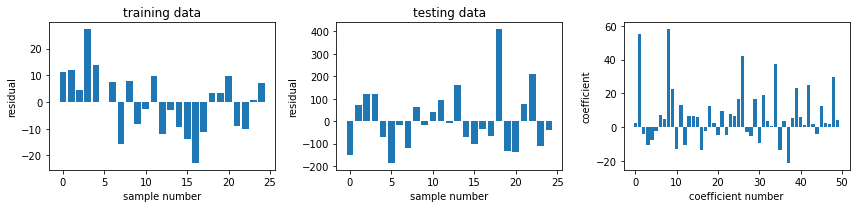

In [23]:
# box plot за residuals на train и test data, както и за стойностите на коефициентите, същото като това по-горе
resid_train = y_train - model.predict(X_train)
resid_test =  y_test - model.predict(X_test)                                     

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [35]:
### Демонстрация на LASSO regression. Използваме клас Lasso от sklearn.linear_model
# по аналогичен начин може да използваме ElasticNet, като променяме alpha и l1_ratio (от 0 за Ridge до 1 за LASSO)
model = linear_model.Lasso(alpha=1.0) # избираме тази стойност на alpha; моделът има същото име
model.fit(X_train, y_train)

Lasso()

In [25]:
# пресмятаме SSE за test и train data; sse вече не е 0 за train data, а за test е чувствително намалено.
sse_train = sse(y_train - model.predict(X_train))
sse_test = sse(y_test - model.predict(X_test))
print(sse_train, sse_test)

1061.6129132517704 123007.15928521624


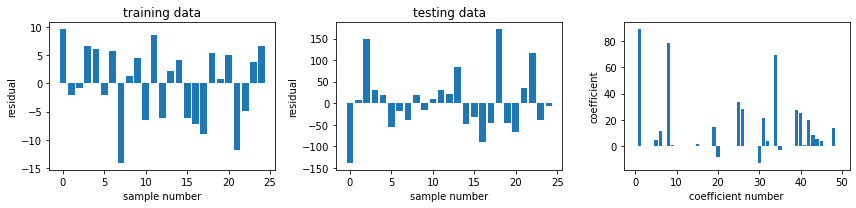

In [26]:
# box plot за residuals на train и test data, както и за стойностите на коефициентите, същото като това по-горе
# тук забелязваме, че доста от стойностите на коефициентите са 0
resid_train = y_train - model.predict(X_train)
resid_test =  y_test - model.predict(X_test)                                     

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [27]:
### LASSO с автоматично търсене на подходяща стойност на alpha при k-fold cross-validation; k=3 by default
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV()

In [28]:
# пресмятаме SSE за test и train data; sse е почти еднакво за двете
sse_train = sse(y_train - model.predict(X_train))
sse_test = sse(y_test - model.predict(X_test))
print(sse_train, sse_test)

6.226584723704194 8.959564003648666


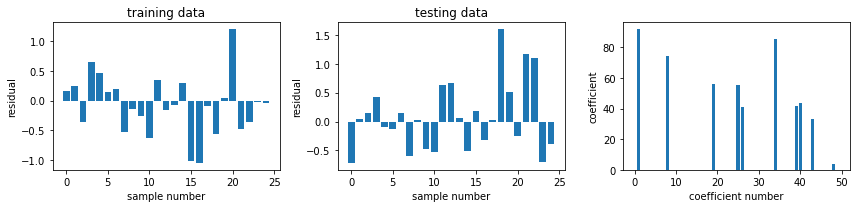

In [29]:
# box plot за residuals на train и test data, както и за стойностите на коефициентите, същото като това по-горе
# тук забелязваме, че са останали 10-тина коефициента, съществено различни от 0
resid_train = y_train - model.predict(X_train)
resid_test =  y_test - model.predict(X_test)                                     

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [34]:
model.coef_
model.alpha_

0.15769917429853006